In [1]:
import pandas as pd
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv("/Users/vipulghare/Desktop/Trinity College Dublin/Sem 1/Machine Learning/Assignments/Final Assignment/Codes/Preprocessing/TFIDFmainDF/Finaldf.csv")

In [3]:
df.head()

,Unnamed: 0,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,...,neighover_tfidf491,neighover_tfidf492,neighover_tfidf493,neighover_tfidf494,neighover_tfidf495,neighover_tfidf496,neighover_tfidf497,neighover_tfidf498,neighover_tfidf499,REVIEWS
0,0,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,0.123630,-0.095952,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,WE ENJOY OUR STAY VERI MUCH THE ROOM WA COMFOR...
1,1,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,-0.614788,-0.098514,...,0.0,0.0,0.0,0.0,0.122717,0.0,0.0,0.0,0.0,TERESA AND FAMILI WERE LOVE HOST THEY WERE WEL...
2,2,2.039449,0.0,-0.106488,-0.105271,1.0,-1.062338,-0.569968,-0.614788,-0.117307,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,MARGARET IS VERI HELP AND ATTENT SHE AND HER H...
3,3,2.036150,1.0,-0.111424,-0.111146,1.0,1.585458,0.518073,1.600464,-0.087410,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ROBBI WA VERI WELCOM AND WE HAD A VERI GOOD TI...
4,4,2.032851,0.0,-0.096617,-0.102333,1.0,1.055899,-0.569968,0.862047,0.058660,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,WE HAD A WONDER TIME STAY IN GRAINN APART THE ...


In [4]:
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [5]:
df.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,...,neighover_tfidf491,neighover_tfidf492,neighover_tfidf493,neighover_tfidf494,neighover_tfidf495,neighover_tfidf496,neighover_tfidf497,neighover_tfidf498,neighover_tfidf499,REVIEWS
0,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,0.123630,-0.095952,-0.115537,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,WE ENJOY OUR STAY VERI MUCH THE ROOM WA COMFOR...
1,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,-0.614788,-0.098514,-0.115537,...,0.0,0.0,0.0,0.0,0.122717,0.0,0.0,0.0,0.0,TERESA AND FAMILI WERE LOVE HOST THEY WERE WEL...
2,2.039449,0.0,-0.106488,-0.105271,1.0,-1.062338,-0.569968,-0.614788,-0.117307,-0.151044,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,MARGARET IS VERI HELP AND ATTENT SHE AND HER H...
3,2.036150,1.0,-0.111424,-0.111146,1.0,1.585458,0.518073,1.600464,-0.087410,-0.186551,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ROBBI WA VERI WELCOM AND WE HAD A VERI GOOD TI...
4,2.032851,0.0,-0.096617,-0.102333,1.0,1.055899,-0.569968,0.862047,0.058660,-0.115537,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,WE HAD A WONDER TIME STAY IN GRAINN APART THE ...


In [6]:
len(df)

7567

In [7]:
vectorizer = TfidfVectorizer(max_features=2000)

In [8]:
df.REVIEWS

0       WE ENJOY OUR STAY VERI MUCH THE ROOM WA COMFOR...
1       TERESA AND FAMILI WERE LOVE HOST THEY WERE WEL...
2       MARGARET IS VERI HELP AND ATTENT SHE AND HER H...
3       ROBBI WA VERI WELCOM AND WE HAD A VERI GOOD TI...
4       WE HAD A WONDER TIME STAY IN GRAINN APART THE ...
                              ...                        
7562                                   REVIEW NOT PRESENT
7563                                   REVIEW NOT PRESENT
7564                                   REVIEW NOT PRESENT
7565                                   REVIEW NOT PRESENT
7566                                   REVIEW NOT PRESENT
Name: REVIEWS, Length: 7567, dtype: object

In [9]:
reviewsTFIDF = vectorizer.fit_transform(df.REVIEWS)

In [10]:
reviewsTFIDF =  reviewsTFIDF.toarray()

In [11]:
df1 = pd.DataFrame(data=reviewsTFIDF)

In [12]:
df1.columns = ['review' + str(x) for x in range(0,2000,1)]

In [13]:
H = df
H = H.join(df1)
H = H.drop(columns=["REVIEWS"],axis=1)
X = H.drop(columns=["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"])
Y = H[["review_scores_rating"]]

In [14]:
X.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,...,review1990,review1991,review1992,review1993,review1994,review1995,review1996,review1997,review1998,review1999
0,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,0.123630,-0.095952,-0.115537,...,0.005172,0.061554,0.000000,0.005673,0.000000,0.030078,0.000000,0.0,0.0,0.0
1,2.401216,1.0,-0.111424,-0.111146,1.0,-0.532779,-0.569968,-0.614788,-0.098514,-0.115537,...,0.000000,0.050577,0.000000,0.000000,0.000000,0.008349,0.003202,0.0,0.0,0.0
2,2.039449,0.0,-0.106488,-0.105271,1.0,-1.062338,-0.569968,-0.614788,-0.117307,-0.151044,...,0.002338,0.069240,0.000000,0.002564,0.000000,0.015104,0.002897,0.0,0.0,0.0
3,2.036150,1.0,-0.111424,-0.111146,1.0,1.585458,0.518073,1.600464,-0.087410,-0.186551,...,0.002184,0.030031,0.002677,0.002395,0.002628,0.012699,0.000000,0.0,0.0,0.0
4,2.032851,0.0,-0.096617,-0.102333,1.0,1.055899,-0.569968,0.862047,0.058660,-0.115537,...,0.004189,0.101929,0.000000,0.000000,0.000000,0.018948,0.005191,0.0,0.0,0.0


In [15]:
Y

,review_scores_rating
0,4.780000
1,4.790000
2,4.740000
3,4.840000
4,4.630000
...,...
7562,4.603239
7563,4.603239
7564,4.603239
7565,4.603239


In [16]:
import numpy as np

In [17]:
Y['review_scores_rating_Scaled']=np.power((Y['review_scores_rating']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/1884944608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_rating_Scaled']=np.power((Y['review_scores_rating']),4)


In [18]:
Y = Y.drop(columns=["review_scores_rating"],axis=1)

# ModelTraining

# 1) review_scores_rating

In [19]:
import os
os.chdir("/Users/vipulghare/Desktop/Trinity College Dublin/Sem 1/Machine Learning/Assignments/Final Assignment/Codes/Preprocessing/dummywork")

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [21]:
import numpy as np

In [22]:
import tensorflow as tf

In [23]:
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    
    model.add(Dense(64,input_dim = len(xtrain.columns))) 
    
    DROPOUT_LAYER_RATE = hp.Choice("rate",values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4])
    model.add(Dropout(rate=DROPOUT_LAYER_RATE))   
    
    momentum_param = hp.Choice("momentum",values=[0.01,0.02,0.03,0.04])
    opt = tf.keras.optimizers.SGD(momentum=momentum_param)
    
    HLS = hp.Int("units", min_value=32, max_value=257, step=32)
    model.add(Dense(units=HLS))      
    
    model.add(Dense(1,activation="relu"))
    
    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])
    
    return model

In [24]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir30',
    project_name='keras_tuner_demo23'
)



2023-01-04 00:30:18.162098: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_mean_squared_error: 16009.1953125

Best val_mean_squared_error So Far: 15751.9921875
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

224

In [27]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.15

In [28]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.02

In [29]:
model = Sequential()
model.add(Dropout(0.2,input_dim=len(xtrain.columns)))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(224,activation="relu"))
model.add(Dense(1))

In [30]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [31]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 11ms/step - loss: 148045.1761 - mean_squared_error: 148045.1761 - val_loss: 16732.9863 - val_mean_squared_error: 16732.9863
Epoch 2/200
76/76 [==============================] - 1s 10ms/step - loss: 15454.4354 - mean_squared_error: 15454.4354 - val_loss: 13719.7441 - val_mean_squared_error: 13719.7441
Epoch 3/200
76/76 [==============================] - 1s 10ms/step - loss: 13041.3607 - mean_squared_error: 13041.3607 - val_loss: 12044.5752 - val_mean_squared_error: 12044.5752
Epoch 4/200
76/76 [==============================] - 1s 10ms/step - loss: 9816.4925 - mean_squared_error: 9816.4925 - val_loss: 11424.1660 - val_mean_squared_error: 11424.1660
Epoch 5/200
76/76 [==============================] - 1s 10ms/step - loss: 8930.9437 - mean_squared_error: 8930.9437 - val_loss: 10947.6943 - val_mean_squared_error: 10947.6943
Epoch 6/200
76/76 [==============================] - 1s 10ms/step - loss: 8260.6610 - mean_squared_error: 8260.6

76/76 [==============================] - 1s 10ms/step - loss: 2137.6991 - mean_squared_error: 2137.6991 - val_loss: 11264.0137 - val_mean_squared_error: 11264.0137
Epoch 48/200
76/76 [==============================] - 1s 10ms/step - loss: 1825.2043 - mean_squared_error: 1825.2043 - val_loss: 12130.7559 - val_mean_squared_error: 12130.7559
Epoch 49/200
76/76 [==============================] - 1s 10ms/step - loss: 1911.4361 - mean_squared_error: 1911.4361 - val_loss: 12970.9072 - val_mean_squared_error: 12970.9072
Epoch 50/200
76/76 [==============================] - 1s 10ms/step - loss: 1997.6769 - mean_squared_error: 1997.6769 - val_loss: 11044.0439 - val_mean_squared_error: 11044.0439
Epoch 51/200
76/76 [==============================] - 1s 10ms/step - loss: 1815.9852 - mean_squared_error: 1815.9852 - val_loss: 10776.7920 - val_mean_squared_error: 10776.7920
Epoch 52/200
76/76 [==============================] - 1s 9ms/step - loss: 1844.9715 - mean_squared_error: 1844.9715 - val_loss: 

76/76 [==============================] - 1s 10ms/step - loss: 1338.2322 - mean_squared_error: 1338.2322 - val_loss: 11656.9229 - val_mean_squared_error: 11656.9229
Epoch 94/200
76/76 [==============================] - 1s 10ms/step - loss: 1306.1192 - mean_squared_error: 1306.1192 - val_loss: 10947.1729 - val_mean_squared_error: 10947.1729
Epoch 95/200
76/76 [==============================] - 1s 10ms/step - loss: 1308.5355 - mean_squared_error: 1308.5355 - val_loss: 11322.2559 - val_mean_squared_error: 11322.2559
Epoch 96/200
76/76 [==============================] - 1s 10ms/step - loss: 1366.1449 - mean_squared_error: 1366.1449 - val_loss: 11618.8477 - val_mean_squared_error: 11618.8477
Epoch 97/200
76/76 [==============================] - 1s 10ms/step - loss: 1356.8239 - mean_squared_error: 1356.8239 - val_loss: 11889.0283 - val_mean_squared_error: 11889.0283
Epoch 98/200
76/76 [==============================] - 1s 10ms/step - loss: 1357.8790 - mean_squared_error: 1357.8790 - val_loss:

76/76 [==============================] - 1s 10ms/step - loss: 1210.6210 - mean_squared_error: 1210.6210 - val_loss: 11383.6455 - val_mean_squared_error: 11383.6455
Epoch 140/200
76/76 [==============================] - 1s 10ms/step - loss: 1012.7353 - mean_squared_error: 1012.7353 - val_loss: 11626.8047 - val_mean_squared_error: 11626.8047
Epoch 141/200
76/76 [==============================] - 1s 10ms/step - loss: 1116.6610 - mean_squared_error: 1116.6610 - val_loss: 11857.7842 - val_mean_squared_error: 11857.7842
Epoch 142/200
76/76 [==============================] - 1s 10ms/step - loss: 1015.3711 - mean_squared_error: 1015.3711 - val_loss: 11812.0371 - val_mean_squared_error: 11812.0371
Epoch 143/200
76/76 [==============================] - 1s 10ms/step - loss: 1050.8697 - mean_squared_error: 1050.8697 - val_loss: 11623.4189 - val_mean_squared_error: 11623.4189
Epoch 144/200
76/76 [==============================] - 1s 10ms/step - loss: 1008.1821 - mean_squared_error: 1008.1821 - val_

76/76 [==============================] - 1s 10ms/step - loss: 1107.9907 - mean_squared_error: 1107.9907 - val_loss: 12042.5586 - val_mean_squared_error: 12042.5586
Epoch 186/200
76/76 [==============================] - 1s 10ms/step - loss: 873.4093 - mean_squared_error: 873.4093 - val_loss: 11791.4219 - val_mean_squared_error: 11791.4219
Epoch 187/200
76/76 [==============================] - 1s 10ms/step - loss: 885.5682 - mean_squared_error: 885.5682 - val_loss: 12114.5488 - val_mean_squared_error: 12114.5488
Epoch 188/200
76/76 [==============================] - 1s 10ms/step - loss: 1016.3228 - mean_squared_error: 1016.3228 - val_loss: 12030.6475 - val_mean_squared_error: 12030.6475
Epoch 189/200
76/76 [==============================] - 1s 10ms/step - loss: 861.0038 - mean_squared_error: 861.0038 - val_loss: 12423.1182 - val_mean_squared_error: 12423.1182
Epoch 190/200
76/76 [==============================] - 1s 10ms/step - loss: 943.5470 - mean_squared_error: 943.5470 - val_loss: 11

In [32]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


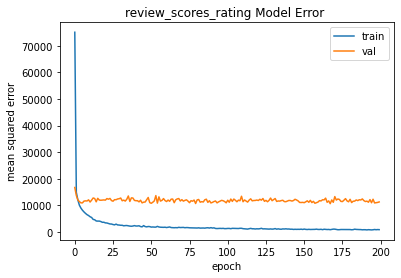

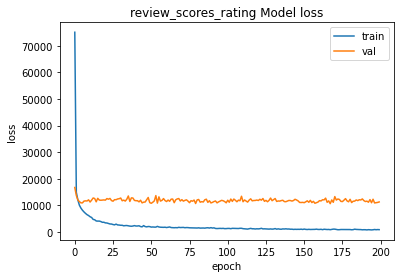

In [33]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_rating Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_rating Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [34]:
history.history["mean_squared_error"][199]

869.7924194335938

In [35]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 869.792419
baseline is : 17418.529304
Our model is accepted


# 2) review_scores_ accuracy

In [36]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"])
Y = H[["review_scores_accuracy"]]

In [37]:
Y

,review_scores_accuracy
0,4.830000
1,4.860000
2,4.770000
3,4.880000
4,4.890000
...,...
7562,4.776713
7563,4.776713
7564,4.776713
7565,4.776713


In [38]:
Y['review_scores_accuracy_scaled']=np.power((Y['review_scores_accuracy']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/4187273479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_accuracy_scaled']=np.power((Y['review_scores_accuracy']),4)


In [39]:
Y = Y.drop(columns=["review_scores_accuracy"],axis=1)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [41]:
tuner.search(X,Y,validation_split=0.2)

Trial 42 Complete [00h 00m 04s]
val_mean_squared_error: 7142.21337890625

Best val_mean_squared_error So Far: 6556.2001953125
Total elapsed time: 00h 03m 56s
INFO:tensorflow:Oracle triggered exit


In [42]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

224

In [43]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.15

In [44]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.01

In [45]:
model = Sequential()
model.add(Dropout(0.25,input_dim=len(xtrain.columns)))
model.add(Dense(96,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(96,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(96,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(96,activation="relu"))
model.add(Dense(1))

In [46]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [47]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 6ms/step - loss: 235602.9140 - mean_squared_error: 235602.9140 - val_loss: 18173.5352 - val_mean_squared_error: 18173.5352
Epoch 2/200
76/76 [==============================] - 0s 4ms/step - loss: 17630.7823 - mean_squared_error: 17630.7823 - val_loss: 11092.8066 - val_mean_squared_error: 11092.8066
Epoch 3/200
76/76 [==============================] - 0s 4ms/step - loss: 13598.7356 - mean_squared_error: 13598.7356 - val_loss: 10032.2295 - val_mean_squared_error: 10032.2295
Epoch 4/200
76/76 [==============================] - 0s 4ms/step - loss: 10952.8798 - mean_squared_error: 10952.8798 - val_loss: 9939.5156 - val_mean_squared_error: 9939.5156
Epoch 5/200
76/76 [==============================] - 0s 4ms/step - loss: 10184.3591 - mean_squared_error: 10184.3591 - val_loss: 9478.1250 - val_mean_squared_error: 9478.1250
Epoch 6/200
76/76 [==============================] - 0s 4ms/step - loss: 9190.8095 - mean_squared_error: 9190.8095 - 

76/76 [==============================] - 0s 4ms/step - loss: 2718.4873 - mean_squared_error: 2718.4873 - val_loss: 17985.6914 - val_mean_squared_error: 17985.6914
Epoch 48/200
76/76 [==============================] - 0s 4ms/step - loss: 2506.7479 - mean_squared_error: 2506.7479 - val_loss: 17422.6523 - val_mean_squared_error: 17422.6523
Epoch 49/200
76/76 [==============================] - 0s 4ms/step - loss: 2768.8367 - mean_squared_error: 2768.8367 - val_loss: 19162.2207 - val_mean_squared_error: 19162.2207
Epoch 50/200
76/76 [==============================] - 0s 4ms/step - loss: 2785.2198 - mean_squared_error: 2785.2198 - val_loss: 22776.6641 - val_mean_squared_error: 22776.6641
Epoch 51/200
76/76 [==============================] - 0s 4ms/step - loss: 2694.0740 - mean_squared_error: 2694.0740 - val_loss: 19612.8047 - val_mean_squared_error: 19612.8047
Epoch 52/200
76/76 [==============================] - 0s 4ms/step - loss: 2527.5585 - mean_squared_error: 2527.5585 - val_loss: 16951

76/76 [==============================] - 0s 4ms/step - loss: 1776.5519 - mean_squared_error: 1776.5519 - val_loss: 19796.0762 - val_mean_squared_error: 19796.0762
Epoch 94/200
76/76 [==============================] - 0s 4ms/step - loss: 1901.4367 - mean_squared_error: 1901.4367 - val_loss: 21565.1426 - val_mean_squared_error: 21565.1426
Epoch 95/200
76/76 [==============================] - 0s 4ms/step - loss: 1856.7887 - mean_squared_error: 1856.7887 - val_loss: 18419.7480 - val_mean_squared_error: 18419.7480
Epoch 96/200
76/76 [==============================] - 0s 4ms/step - loss: 1994.6541 - mean_squared_error: 1994.6541 - val_loss: 18486.4590 - val_mean_squared_error: 18486.4590
Epoch 97/200
76/76 [==============================] - 0s 4ms/step - loss: 2022.2124 - mean_squared_error: 2022.2124 - val_loss: 19623.7871 - val_mean_squared_error: 19623.7871
Epoch 98/200
76/76 [==============================] - 0s 4ms/step - loss: 1869.2417 - mean_squared_error: 1869.2417 - val_loss: 18167

76/76 [==============================] - 0s 4ms/step - loss: 1442.7891 - mean_squared_error: 1442.7891 - val_loss: 20840.4473 - val_mean_squared_error: 20840.4473
Epoch 140/200
76/76 [==============================] - 0s 4ms/step - loss: 1392.4089 - mean_squared_error: 1392.4089 - val_loss: 19259.4883 - val_mean_squared_error: 19259.4883
Epoch 141/200
76/76 [==============================] - 0s 4ms/step - loss: 1543.3384 - mean_squared_error: 1543.3384 - val_loss: 19082.8066 - val_mean_squared_error: 19082.8066
Epoch 142/200
76/76 [==============================] - 0s 4ms/step - loss: 1595.2808 - mean_squared_error: 1595.2808 - val_loss: 19439.8691 - val_mean_squared_error: 19439.8691
Epoch 143/200
76/76 [==============================] - 0s 4ms/step - loss: 1492.4252 - mean_squared_error: 1492.4252 - val_loss: 22850.1504 - val_mean_squared_error: 22850.1504
Epoch 144/200
76/76 [==============================] - 0s 4ms/step - loss: 1583.9609 - mean_squared_error: 1583.9609 - val_loss: 

76/76 [==============================] - 0s 4ms/step - loss: 1293.0295 - mean_squared_error: 1293.0295 - val_loss: 21199.1621 - val_mean_squared_error: 21199.1621
Epoch 186/200
76/76 [==============================] - 0s 4ms/step - loss: 1180.7349 - mean_squared_error: 1180.7349 - val_loss: 22588.4980 - val_mean_squared_error: 22588.4980
Epoch 187/200
76/76 [==============================] - 0s 4ms/step - loss: 1213.3859 - mean_squared_error: 1213.3859 - val_loss: 21084.8730 - val_mean_squared_error: 21084.8730
Epoch 188/200
76/76 [==============================] - 0s 4ms/step - loss: 1165.2036 - mean_squared_error: 1165.2036 - val_loss: 19581.0742 - val_mean_squared_error: 19581.0742
Epoch 189/200
76/76 [==============================] - 0s 4ms/step - loss: 1255.0257 - mean_squared_error: 1255.0257 - val_loss: 22463.6582 - val_mean_squared_error: 22463.6582
Epoch 190/200
76/76 [==============================] - 0s 4ms/step - loss: 1232.5848 - mean_squared_error: 1232.5848 - val_loss: 

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


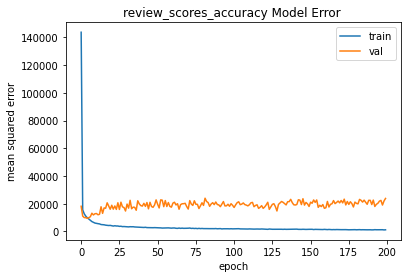

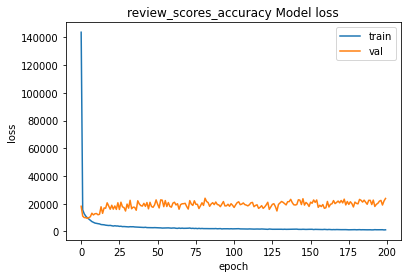

In [48]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_accuracy Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_accuracy Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [49]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 1197.917236
baseline is : 10736.957667
Our model is accepted


# 3) review_scores_cleanliness

In [50]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_accuracy","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"])
Y = H[["review_scores_cleanliness"]]

In [51]:
Y['review_scores_cleanliness_scaled']=np.power((Y['review_scores_cleanliness']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/3749202082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_cleanliness_scaled']=np.power((Y['review_scores_cleanliness']),4)


In [52]:
Y = Y.drop(columns=["review_scores_cleanliness"],axis=1)

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [54]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir41',
    project_name='keras_tuner_demo23'
)

In [55]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_mean_squared_error: 8885.3212890625

Best val_mean_squared_error So Far: 8017.486328125
Total elapsed time: 00h 00m 57s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

224

In [57]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.1

In [58]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.02

In [59]:
model = Sequential()
model.add(Dropout(0.4,input_dim=len(xtrain.columns)))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.01))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.01))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.01))
model.add(Dense(224,activation="relu"))
model.add(Dense(1))

In [60]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [61]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 12ms/step - loss: 152961.5162 - mean_squared_error: 152961.5162 - val_loss: 17316.4219 - val_mean_squared_error: 17316.4219
Epoch 2/200
76/76 [==============================] - 1s 11ms/step - loss: 19888.1157 - mean_squared_error: 19888.1157 - val_loss: 15578.7500 - val_mean_squared_error: 15578.7500
Epoch 3/200
76/76 [==============================] - 1s 11ms/step - loss: 15499.8229 - mean_squared_error: 15499.8229 - val_loss: 15541.0244 - val_mean_squared_error: 15541.0244
Epoch 4/200
76/76 [==============================] - 1s 11ms/step - loss: 12247.4519 - mean_squared_error: 12247.4519 - val_loss: 21377.2305 - val_mean_squared_error: 21377.2305
Epoch 5/200
76/76 [==============================] - 1s 11ms/step - loss: 11658.0632 - mean_squared_error: 11658.0632 - val_loss: 23017.8301 - val_mean_squared_error: 23017.8301
Epoch 6/200
76/76 [==============================] - 1s 11ms/step - loss: 9992.4966 - mean_squared_error: 99

76/76 [==============================] - 1s 11ms/step - loss: 3364.6486 - mean_squared_error: 3364.6486 - val_loss: 69567.3516 - val_mean_squared_error: 69567.3516
Epoch 48/200
76/76 [==============================] - 1s 10ms/step - loss: 3433.0693 - mean_squared_error: 3433.0693 - val_loss: 84920.9609 - val_mean_squared_error: 84920.9609
Epoch 49/200
76/76 [==============================] - 1s 11ms/step - loss: 3372.6235 - mean_squared_error: 3372.6235 - val_loss: 77439.8672 - val_mean_squared_error: 77439.8672
Epoch 50/200
76/76 [==============================] - 1s 10ms/step - loss: 2909.4031 - mean_squared_error: 2909.4031 - val_loss: 69218.8750 - val_mean_squared_error: 69218.8750
Epoch 51/200
76/76 [==============================] - 1s 10ms/step - loss: 3251.4744 - mean_squared_error: 3251.4744 - val_loss: 82702.0156 - val_mean_squared_error: 82702.0156
Epoch 52/200
76/76 [==============================] - 1s 10ms/step - loss: 3076.6661 - mean_squared_error: 3076.6661 - val_loss:

76/76 [==============================] - 1s 10ms/step - loss: 1849.8239 - mean_squared_error: 1849.8239 - val_loss: 80003.8047 - val_mean_squared_error: 80003.8047
Epoch 94/200
76/76 [==============================] - 1s 10ms/step - loss: 1893.7972 - mean_squared_error: 1893.7972 - val_loss: 83414.9531 - val_mean_squared_error: 83414.9531
Epoch 95/200
76/76 [==============================] - 1s 11ms/step - loss: 1949.8896 - mean_squared_error: 1949.8896 - val_loss: 78691.6484 - val_mean_squared_error: 78691.6484
Epoch 96/200
76/76 [==============================] - 1s 11ms/step - loss: 2088.9131 - mean_squared_error: 2088.9131 - val_loss: 88121.6953 - val_mean_squared_error: 88121.6953
Epoch 97/200
76/76 [==============================] - 1s 11ms/step - loss: 1968.1972 - mean_squared_error: 1968.1972 - val_loss: 77519.6016 - val_mean_squared_error: 77519.6016
Epoch 98/200
76/76 [==============================] - 1s 10ms/step - loss: 2203.3630 - mean_squared_error: 2203.3630 - val_loss:

76/76 [==============================] - 1s 11ms/step - loss: 1582.0199 - mean_squared_error: 1582.0199 - val_loss: 80433.4766 - val_mean_squared_error: 80433.4766
Epoch 140/200
76/76 [==============================] - 1s 11ms/step - loss: 1591.3291 - mean_squared_error: 1591.3291 - val_loss: 87693.6953 - val_mean_squared_error: 87693.6953
Epoch 141/200
76/76 [==============================] - 1s 11ms/step - loss: 1399.8311 - mean_squared_error: 1399.8311 - val_loss: 92689.1875 - val_mean_squared_error: 92689.1875
Epoch 142/200
76/76 [==============================] - 1s 11ms/step - loss: 1547.6275 - mean_squared_error: 1547.6275 - val_loss: 86000.9531 - val_mean_squared_error: 86000.9531
Epoch 143/200
76/76 [==============================] - 1s 11ms/step - loss: 1437.5560 - mean_squared_error: 1437.5560 - val_loss: 80573.7266 - val_mean_squared_error: 80573.7266
Epoch 144/200
76/76 [==============================] - 1s 11ms/step - loss: 1510.7817 - mean_squared_error: 1510.7817 - val_

76/76 [==============================] - 1s 10ms/step - loss: 1065.0133 - mean_squared_error: 1065.0133 - val_loss: 93545.6250 - val_mean_squared_error: 93545.6250
Epoch 186/200
76/76 [==============================] - 1s 11ms/step - loss: 1471.6746 - mean_squared_error: 1471.6746 - val_loss: 81296.7109 - val_mean_squared_error: 81296.7109
Epoch 187/200
76/76 [==============================] - 1s 11ms/step - loss: 1030.9561 - mean_squared_error: 1030.9561 - val_loss: 88564.4688 - val_mean_squared_error: 88564.4688
Epoch 188/200
76/76 [==============================] - 1s 10ms/step - loss: 1184.2026 - mean_squared_error: 1184.2026 - val_loss: 89320.2891 - val_mean_squared_error: 89320.2891
Epoch 189/200
76/76 [==============================] - 1s 10ms/step - loss: 1218.7260 - mean_squared_error: 1218.7260 - val_loss: 90463.7344 - val_mean_squared_error: 90463.7344
Epoch 190/200
76/76 [==============================] - 1s 10ms/step - loss: 1128.4910 - mean_squared_error: 1128.4910 - val_

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


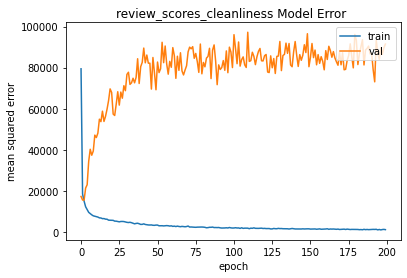

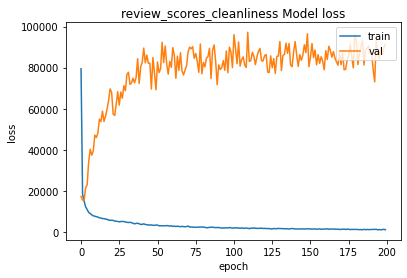

In [62]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_cleanliness Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_cleanliness Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [63]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 1161.743164
baseline is : 16820.044702
Our model is accepted


# 4) review_scores_checkin

In [64]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_cleanliness","review_scores_accuracy","review_scores_communication","review_scores_location","review_scores_value"])
Y = H[["review_scores_checkin"]]

In [65]:
Y['review_scores_checkin_scaled']=np.power((Y['review_scores_checkin']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/389728670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_checkin_scaled']=np.power((Y['review_scores_checkin']),4)


In [66]:
Y = Y.drop(columns=["review_scores_checkin"],axis=1)

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [68]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir42',
    project_name='keras_tuner_demo23'
)

In [69]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 03s]
val_mean_squared_error: 6368.61279296875

Best val_mean_squared_error So Far: 6041.037109375
Total elapsed time: 00h 00m 49s
INFO:tensorflow:Oracle triggered exit


In [70]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.1

In [71]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

224

In [72]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.01

In [73]:
model = Sequential()
model.add(Dropout(0.3,input_dim=len(xtrain.columns)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.03))
model.add(Dense(256,activation="relu"))
model.add(Dense(1))

In [74]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [75]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 13ms/step - loss: 181108.1338 - mean_squared_error: 181108.1338 - val_loss: 11690.0020 - val_mean_squared_error: 11690.0020
Epoch 2/200
76/76 [==============================] - 1s 12ms/step - loss: 11998.0093 - mean_squared_error: 11998.0093 - val_loss: 9258.5576 - val_mean_squared_error: 9258.5576
Epoch 3/200
76/76 [==============================] - 1s 12ms/step - loss: 9609.9610 - mean_squared_error: 9609.9610 - val_loss: 8450.5547 - val_mean_squared_error: 8450.5547
Epoch 4/200
76/76 [==============================] - 1s 12ms/step - loss: 7808.8037 - mean_squared_error: 7808.8037 - val_loss: 10696.5430 - val_mean_squared_error: 10696.5430
Epoch 5/200
76/76 [==============================] - 1s 12ms/step - loss: 6669.6016 - mean_squared_error: 6669.6016 - val_loss: 13993.8477 - val_mean_squared_error: 13993.8477
Epoch 6/200
76/76 [==============================] - 1s 12ms/step - loss: 5693.3124 - mean_squared_error: 5693.3124 - 

76/76 [==============================] - 1s 12ms/step - loss: 2586.8163 - mean_squared_error: 2586.8163 - val_loss: 26872.0566 - val_mean_squared_error: 26872.0566
Epoch 48/200
76/76 [==============================] - 1s 12ms/step - loss: 2391.4986 - mean_squared_error: 2391.4986 - val_loss: 31650.9785 - val_mean_squared_error: 31650.9785
Epoch 49/200
76/76 [==============================] - 1s 12ms/step - loss: 2374.6453 - mean_squared_error: 2374.6453 - val_loss: 25416.0508 - val_mean_squared_error: 25416.0508
Epoch 50/200
76/76 [==============================] - 1s 13ms/step - loss: 2255.0151 - mean_squared_error: 2255.0151 - val_loss: 26246.7500 - val_mean_squared_error: 26246.7500
Epoch 51/200
76/76 [==============================] - 1s 13ms/step - loss: 2266.8578 - mean_squared_error: 2266.8578 - val_loss: 30381.1074 - val_mean_squared_error: 30381.1074
Epoch 52/200
76/76 [==============================] - 1s 13ms/step - loss: 2444.8804 - mean_squared_error: 2444.8804 - val_loss:

76/76 [==============================] - 1s 12ms/step - loss: 1314.3686 - mean_squared_error: 1314.3686 - val_loss: 27235.5234 - val_mean_squared_error: 27235.5234
Epoch 94/200
76/76 [==============================] - 1s 12ms/step - loss: 1294.2538 - mean_squared_error: 1294.2538 - val_loss: 23970.0469 - val_mean_squared_error: 23970.0469
Epoch 95/200
76/76 [==============================] - 1s 12ms/step - loss: 1534.0431 - mean_squared_error: 1534.0431 - val_loss: 28579.8809 - val_mean_squared_error: 28579.8809
Epoch 96/200
76/76 [==============================] - 1s 12ms/step - loss: 1485.4147 - mean_squared_error: 1485.4147 - val_loss: 29112.2246 - val_mean_squared_error: 29112.2246
Epoch 97/200
76/76 [==============================] - 1s 12ms/step - loss: 1401.4361 - mean_squared_error: 1401.4361 - val_loss: 31003.4355 - val_mean_squared_error: 31003.4355
Epoch 98/200
76/76 [==============================] - 1s 12ms/step - loss: 1424.0956 - mean_squared_error: 1424.0956 - val_loss:

76/76 [==============================] - 1s 12ms/step - loss: 1198.8702 - mean_squared_error: 1198.8702 - val_loss: 27654.1562 - val_mean_squared_error: 27654.1562
Epoch 140/200
76/76 [==============================] - 1s 12ms/step - loss: 1215.9631 - mean_squared_error: 1215.9631 - val_loss: 24748.4199 - val_mean_squared_error: 24748.4199
Epoch 141/200
76/76 [==============================] - 1s 12ms/step - loss: 1318.1684 - mean_squared_error: 1318.1684 - val_loss: 25971.5781 - val_mean_squared_error: 25971.5781
Epoch 142/200
76/76 [==============================] - 1s 12ms/step - loss: 1214.6303 - mean_squared_error: 1214.6303 - val_loss: 29184.6172 - val_mean_squared_error: 29184.6172
Epoch 143/200
76/76 [==============================] - 1s 12ms/step - loss: 1088.1214 - mean_squared_error: 1088.1214 - val_loss: 27161.1973 - val_mean_squared_error: 27161.1973
Epoch 144/200
76/76 [==============================] - 1s 12ms/step - loss: 1060.8301 - mean_squared_error: 1060.8301 - val_

76/76 [==============================] - 1s 12ms/step - loss: 958.7845 - mean_squared_error: 958.7845 - val_loss: 27775.6855 - val_mean_squared_error: 27775.6855
Epoch 186/200
76/76 [==============================] - 1s 12ms/step - loss: 977.2763 - mean_squared_error: 977.2763 - val_loss: 27301.7852 - val_mean_squared_error: 27301.7852
Epoch 187/200
76/76 [==============================] - 1s 12ms/step - loss: 1040.4681 - mean_squared_error: 1040.4681 - val_loss: 29846.5664 - val_mean_squared_error: 29846.5664
Epoch 188/200
76/76 [==============================] - 1s 12ms/step - loss: 932.1280 - mean_squared_error: 932.1280 - val_loss: 26613.6934 - val_mean_squared_error: 26613.6934
Epoch 189/200
76/76 [==============================] - 1s 12ms/step - loss: 950.0059 - mean_squared_error: 950.0059 - val_loss: 25892.4316 - val_mean_squared_error: 25892.4316
Epoch 190/200
76/76 [==============================] - 1s 12ms/step - loss: 969.6219 - mean_squared_error: 969.6219 - val_loss: 2963

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


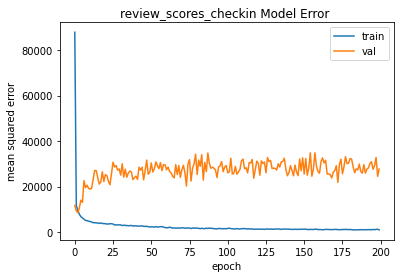

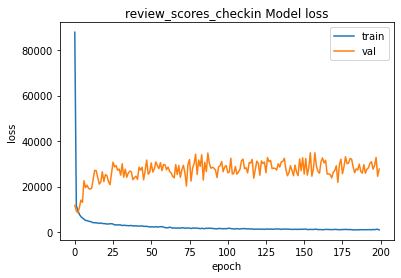

In [76]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_checkin Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_checkin Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [77]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 918.034607
baseline is : 8995.261726
Our model is accepted


# 5) review_scores_ communication

In [78]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_accuracy","review_scores_location","review_scores_value"])
Y = H[["review_scores_communication"]]

In [79]:
Y['review_scores_communication_scaled']=np.power((Y['review_scores_communication']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/1461199632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_communication_scaled']=np.power((Y['review_scores_communication']),4)


In [80]:
Y = Y.drop(columns=["review_scores_communication"],axis=1)

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [82]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir52',
    project_name='keras_tuner_demo23'
)

In [83]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_mean_squared_error: 5578.5546875

Best val_mean_squared_error So Far: 5578.5546875
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit


In [84]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

256

In [85]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.25

In [86]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.02

In [87]:
model = Sequential()
model.add(Dropout(0.2,input_dim=len(xtrain.columns)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(256,activation="relu"))
model.add(Dense(1))

In [88]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [89]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 14ms/step - loss: 176490.3112 - mean_squared_error: 176490.3112 - val_loss: 9659.7568 - val_mean_squared_error: 9659.7568
Epoch 2/200
76/76 [==============================] - 1s 13ms/step - loss: 10963.0394 - mean_squared_error: 10963.0394 - val_loss: 8669.9756 - val_mean_squared_error: 8669.9756
Epoch 3/200
76/76 [==============================] - 1s 13ms/step - loss: 8507.2809 - mean_squared_error: 8507.2809 - val_loss: 7244.9058 - val_mean_squared_error: 7244.9058
Epoch 4/200
76/76 [==============================] - 1s 12ms/step - loss: 6992.9132 - mean_squared_error: 6992.9132 - val_loss: 6999.0464 - val_mean_squared_error: 6999.0464
Epoch 5/200
76/76 [==============================] - 1s 13ms/step - loss: 5698.7425 - mean_squared_error: 5698.7425 - val_loss: 9210.4570 - val_mean_squared_error: 9210.4570
Epoch 6/200
76/76 [==============================] - 1s 14ms/step - loss: 4857.4964 - mean_squared_error: 4857.4964 - val_lo

76/76 [==============================] - 1s 13ms/step - loss: 2045.0435 - mean_squared_error: 2045.0435 - val_loss: 11322.0020 - val_mean_squared_error: 11322.0020
Epoch 48/200
76/76 [==============================] - 1s 13ms/step - loss: 1434.8969 - mean_squared_error: 1434.8969 - val_loss: 13814.0459 - val_mean_squared_error: 13814.0459
Epoch 49/200
76/76 [==============================] - 1s 13ms/step - loss: 1392.3467 - mean_squared_error: 1392.3467 - val_loss: 10553.3730 - val_mean_squared_error: 10553.3730
Epoch 50/200
76/76 [==============================] - 1s 13ms/step - loss: 1496.5804 - mean_squared_error: 1496.5804 - val_loss: 13879.9229 - val_mean_squared_error: 13879.9229
Epoch 51/200
76/76 [==============================] - 1s 13ms/step - loss: 1468.3893 - mean_squared_error: 1468.3893 - val_loss: 12144.6973 - val_mean_squared_error: 12144.6973
Epoch 52/200
76/76 [==============================] - 1s 13ms/step - loss: 1501.9726 - mean_squared_error: 1501.9726 - val_loss:

76/76 [==============================] - 1s 12ms/step - loss: 1042.6346 - mean_squared_error: 1042.6346 - val_loss: 10665.8965 - val_mean_squared_error: 10665.8965
Epoch 94/200
76/76 [==============================] - 1s 13ms/step - loss: 1037.9801 - mean_squared_error: 1037.9801 - val_loss: 11044.3066 - val_mean_squared_error: 11044.3066
Epoch 95/200
76/76 [==============================] - 1s 13ms/step - loss: 1002.5451 - mean_squared_error: 1002.5451 - val_loss: 10151.8477 - val_mean_squared_error: 10151.8477
Epoch 96/200
76/76 [==============================] - 1s 12ms/step - loss: 1051.4371 - mean_squared_error: 1051.4371 - val_loss: 13596.9092 - val_mean_squared_error: 13596.9092
Epoch 97/200
76/76 [==============================] - 1s 12ms/step - loss: 1268.5165 - mean_squared_error: 1268.5165 - val_loss: 11220.1338 - val_mean_squared_error: 11220.1338
Epoch 98/200
76/76 [==============================] - 1s 12ms/step - loss: 1073.7448 - mean_squared_error: 1073.7448 - val_loss:

76/76 [==============================] - 1s 13ms/step - loss: 979.5522 - mean_squared_error: 979.5522 - val_loss: 14078.5908 - val_mean_squared_error: 14078.5908
Epoch 140/200
76/76 [==============================] - 1s 13ms/step - loss: 851.8601 - mean_squared_error: 851.8601 - val_loss: 11276.3291 - val_mean_squared_error: 11276.3291
Epoch 141/200
76/76 [==============================] - 1s 13ms/step - loss: 1096.6051 - mean_squared_error: 1096.6051 - val_loss: 9954.5801 - val_mean_squared_error: 9954.5801
Epoch 142/200
76/76 [==============================] - 1s 12ms/step - loss: 931.1068 - mean_squared_error: 931.1068 - val_loss: 10345.0400 - val_mean_squared_error: 10345.0400
Epoch 143/200
76/76 [==============================] - 1s 12ms/step - loss: 804.8284 - mean_squared_error: 804.8284 - val_loss: 12246.7305 - val_mean_squared_error: 12246.7305
Epoch 144/200
76/76 [==============================] - 1s 13ms/step - loss: 844.3851 - mean_squared_error: 844.3851 - val_loss: 11919.

Epoch 186/200
76/76 [==============================] - 2s 20ms/step - loss: 877.7047 - mean_squared_error: 877.7047 - val_loss: 9363.1895 - val_mean_squared_error: 9363.1895
Epoch 187/200
76/76 [==============================] - 1s 16ms/step - loss: 795.0500 - mean_squared_error: 795.0500 - val_loss: 12492.9424 - val_mean_squared_error: 12492.9424
Epoch 188/200
76/76 [==============================] - 1s 15ms/step - loss: 772.3063 - mean_squared_error: 772.3063 - val_loss: 11289.5820 - val_mean_squared_error: 11289.5820
Epoch 189/200
76/76 [==============================] - 1s 14ms/step - loss: 744.5496 - mean_squared_error: 744.5496 - val_loss: 10411.4404 - val_mean_squared_error: 10411.4404
Epoch 190/200
76/76 [==============================] - 1s 14ms/step - loss: 876.8551 - mean_squared_error: 876.8551 - val_loss: 10025.0469 - val_mean_squared_error: 10025.0469
Epoch 191/200
76/76 [==============================] - 1s 14ms/step - loss: 719.6082 - mean_squared_error: 719.6082 - val_

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


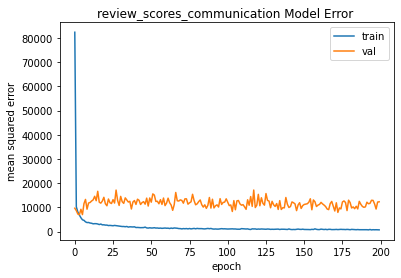

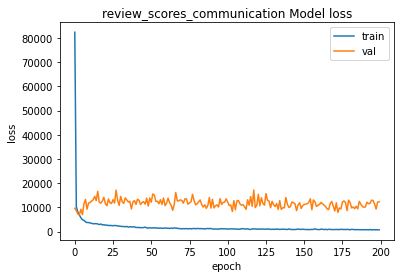

In [90]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_communication Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_communication Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [91]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 718.304504
baseline is : 8280.603836
Our model is accepted


# 6) review_scores_location

In [92]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_accuracy","review_scores_value"])
Y = H[["review_scores_location"]]

In [93]:
Y['review_scores_location_scaled']=np.power((Y['review_scores_location']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/3713574494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_location_scaled']=np.power((Y['review_scores_location']),4)


In [94]:
Y = Y.drop(columns=["review_scores_location"],axis=1)

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [96]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir57',
    project_name='keras_tuner_demo23'
)

In [97]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 05s]
val_mean_squared_error: 7676.81591796875

Best val_mean_squared_error So Far: 7068.283203125
Total elapsed time: 00h 01m 04s
INFO:tensorflow:Oracle triggered exit


In [98]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

160

In [99]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.25

In [100]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.04

In [101]:
model = Sequential()
model.add(Dropout(0.4,input_dim=len(xtrain.columns)))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.02))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.02))
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.02))
model.add(Dense(224,activation="relu"))
model.add(Dense(1))

In [102]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [103]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 13ms/step - loss: 163392.5336 - mean_squared_error: 163392.5336 - val_loss: 12450.7393 - val_mean_squared_error: 12450.7393
Epoch 2/200
76/76 [==============================] - 1s 11ms/step - loss: 14754.9525 - mean_squared_error: 14754.9525 - val_loss: 11526.9580 - val_mean_squared_error: 11526.9580
Epoch 3/200
76/76 [==============================] - 1s 11ms/step - loss: 12143.6553 - mean_squared_error: 12143.6553 - val_loss: 15113.0156 - val_mean_squared_error: 15113.0156
Epoch 4/200
76/76 [==============================] - 1s 11ms/step - loss: 9707.9248 - mean_squared_error: 9707.9248 - val_loss: 15757.8545 - val_mean_squared_error: 15757.8545
Epoch 5/200
76/76 [==============================] - 1s 12ms/step - loss: 7806.3143 - mean_squared_error: 7806.3143 - val_loss: 27229.4062 - val_mean_squared_error: 27229.4062
Epoch 6/200
76/76 [==============================] - 1s 12ms/step - loss: 7810.8089 - mean_squared_error: 7810.8

76/76 [==============================] - 1s 11ms/step - loss: 3417.3670 - mean_squared_error: 3417.3670 - val_loss: 54153.9414 - val_mean_squared_error: 54153.9414
Epoch 48/200
76/76 [==============================] - 1s 11ms/step - loss: 3056.0480 - mean_squared_error: 3056.0480 - val_loss: 53790.1562 - val_mean_squared_error: 53790.1562
Epoch 49/200
76/76 [==============================] - 1s 11ms/step - loss: 3035.2289 - mean_squared_error: 3035.2289 - val_loss: 58621.3711 - val_mean_squared_error: 58621.3711
Epoch 50/200
76/76 [==============================] - 1s 11ms/step - loss: 3232.7273 - mean_squared_error: 3232.7273 - val_loss: 59973.9922 - val_mean_squared_error: 59973.9922
Epoch 51/200
76/76 [==============================] - 1s 14ms/step - loss: 2980.0928 - mean_squared_error: 2980.0928 - val_loss: 56886.8711 - val_mean_squared_error: 56886.8711
Epoch 52/200
76/76 [==============================] - 1s 11ms/step - loss: 2981.4016 - mean_squared_error: 2981.4016 - val_loss:

76/76 [==============================] - 1s 10ms/step - loss: 1940.4662 - mean_squared_error: 1940.4662 - val_loss: 59212.8633 - val_mean_squared_error: 59212.8633
Epoch 94/200
76/76 [==============================] - 1s 10ms/step - loss: 2275.7554 - mean_squared_error: 2275.7554 - val_loss: 59121.8242 - val_mean_squared_error: 59121.8242
Epoch 95/200
76/76 [==============================] - 1s 10ms/step - loss: 1943.0582 - mean_squared_error: 1943.0582 - val_loss: 58088.6406 - val_mean_squared_error: 58088.6406
Epoch 96/200
76/76 [==============================] - 1s 10ms/step - loss: 2165.8982 - mean_squared_error: 2165.8982 - val_loss: 56983.7773 - val_mean_squared_error: 56983.7773
Epoch 97/200
76/76 [==============================] - 1s 11ms/step - loss: 1962.4973 - mean_squared_error: 1962.4973 - val_loss: 52585.9219 - val_mean_squared_error: 52585.9219
Epoch 98/200
76/76 [==============================] - 1s 10ms/step - loss: 1997.0168 - mean_squared_error: 1997.0168 - val_loss:

76/76 [==============================] - 1s 12ms/step - loss: 1599.4557 - mean_squared_error: 1599.4557 - val_loss: 53359.9531 - val_mean_squared_error: 53359.9531
Epoch 140/200
76/76 [==============================] - 1s 12ms/step - loss: 1510.0945 - mean_squared_error: 1510.0945 - val_loss: 58605.2070 - val_mean_squared_error: 58605.2070
Epoch 141/200
76/76 [==============================] - 1s 11ms/step - loss: 1593.1401 - mean_squared_error: 1593.1401 - val_loss: 66483.0156 - val_mean_squared_error: 66483.0156
Epoch 142/200
76/76 [==============================] - 1s 12ms/step - loss: 1507.2387 - mean_squared_error: 1507.2387 - val_loss: 56286.6836 - val_mean_squared_error: 56286.6836
Epoch 143/200
76/76 [==============================] - 1s 12ms/step - loss: 1586.8460 - mean_squared_error: 1586.8460 - val_loss: 61113.2031 - val_mean_squared_error: 61113.2031
Epoch 144/200
76/76 [==============================] - 1s 11ms/step - loss: 1546.9377 - mean_squared_error: 1546.9377 - val_

76/76 [==============================] - 1s 11ms/step - loss: 1391.1211 - mean_squared_error: 1391.1211 - val_loss: 60668.2539 - val_mean_squared_error: 60668.2539
Epoch 186/200
76/76 [==============================] - 1s 11ms/step - loss: 1201.5335 - mean_squared_error: 1201.5335 - val_loss: 65201.9570 - val_mean_squared_error: 65201.9570
Epoch 187/200
76/76 [==============================] - 1s 11ms/step - loss: 1181.9094 - mean_squared_error: 1181.9094 - val_loss: 61890.6406 - val_mean_squared_error: 61890.6406
Epoch 188/200
76/76 [==============================] - 1s 10ms/step - loss: 1408.7905 - mean_squared_error: 1408.7905 - val_loss: 62493.2969 - val_mean_squared_error: 62493.2969
Epoch 189/200
76/76 [==============================] - 1s 11ms/step - loss: 1111.7489 - mean_squared_error: 1111.7489 - val_loss: 66731.0469 - val_mean_squared_error: 66731.0469
Epoch 190/200
76/76 [==============================] - 1s 11ms/step - loss: 1239.5321 - mean_squared_error: 1239.5321 - val_

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


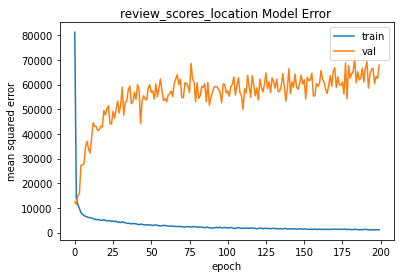

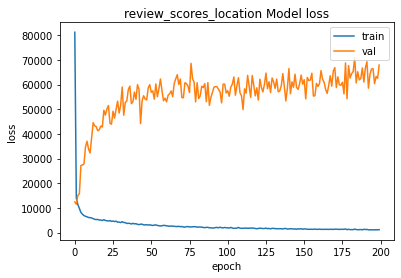

In [104]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_location Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_location Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [105]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 1210.351318
baseline is : 10479.022780
Our model is accepted


# 7) review_scores_value)

In [106]:
X = H.drop(columns=["review_scores_rating","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_accuracy","review_scores_location"])
Y = H[["review_scores_value"]]

In [107]:
Y['review_scores_value_scaled']=np.power((Y['review_scores_value']),4)

/var/folders/bs/t55xb19x4xlb9rmy6mztrj2h0000gn/T/ipykernel_95365/3943979846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['review_scores_value_scaled']=np.power((Y['review_scores_value']),4)


In [108]:
Y = Y.drop(columns=["review_scores_value"],axis=1)

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

In [110]:
tuner = kt.Hyperband(
    model_builder,
    objective= "val_mean_squared_error",
    max_epochs=10,
    directory='keras_tuner_dir62',
    project_name='keras_tuner_demo23'
)

In [111]:
tuner.search(X,Y,validation_split=0.2)

Trial 30 Complete [00h 00m 04s]
val_mean_squared_error: 8847.30078125

Best val_mean_squared_error So Far: 8068.57421875
Total elapsed time: 00h 00m 56s
INFO:tensorflow:Oracle triggered exit


In [112]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

256

In [113]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("momentum")

0.03

In [114]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.1

In [115]:
model = Sequential()
model.add(Dropout(0.4,input_dim=len(xtrain.columns)))
model.add(Dense(192,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(192,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(192,activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(192,activation="relu"))
model.add(Dense(1))

In [116]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=[tf.keras.losses.MeanSquaredError()],
      metrics=["mean_squared_error"])

In [117]:
history = model.fit(xtrain, ytrain,epochs=200,batch_size=64,validation_split=0.2)

Epoch 1/200
76/76 [==============================] - 1s 10ms/step - loss: 144383.2671 - mean_squared_error: 144383.2671 - val_loss: 14679.2002 - val_mean_squared_error: 14679.2002
Epoch 2/200
76/76 [==============================] - 1s 9ms/step - loss: 16290.2174 - mean_squared_error: 16290.2174 - val_loss: 13726.7656 - val_mean_squared_error: 13726.7656
Epoch 3/200
76/76 [==============================] - 1s 9ms/step - loss: 13358.7687 - mean_squared_error: 13358.7687 - val_loss: 15274.9297 - val_mean_squared_error: 15274.9297
Epoch 4/200
76/76 [==============================] - 1s 9ms/step - loss: 11260.3135 - mean_squared_error: 11260.3135 - val_loss: 16379.3457 - val_mean_squared_error: 16379.3457
Epoch 5/200
76/76 [==============================] - 1s 9ms/step - loss: 9498.7422 - mean_squared_error: 9498.7422 - val_loss: 20500.0391 - val_mean_squared_error: 20500.0391
Epoch 6/200
76/76 [==============================] - 1s 9ms/step - loss: 8555.8203 - mean_squared_error: 8555.8203

76/76 [==============================] - 1s 10ms/step - loss: 3667.8873 - mean_squared_error: 3667.8873 - val_loss: 48911.0898 - val_mean_squared_error: 48911.0898
Epoch 48/200
76/76 [==============================] - 1s 10ms/step - loss: 3621.1122 - mean_squared_error: 3621.1122 - val_loss: 54361.7070 - val_mean_squared_error: 54361.7070
Epoch 49/200
76/76 [==============================] - 1s 10ms/step - loss: 3875.5899 - mean_squared_error: 3875.5899 - val_loss: 48237.0742 - val_mean_squared_error: 48237.0742
Epoch 50/200
76/76 [==============================] - 1s 10ms/step - loss: 3345.1874 - mean_squared_error: 3345.1874 - val_loss: 44448.2109 - val_mean_squared_error: 44448.2109
Epoch 51/200
76/76 [==============================] - 1s 10ms/step - loss: 3577.6614 - mean_squared_error: 3577.6614 - val_loss: 49899.1328 - val_mean_squared_error: 49899.1328
Epoch 52/200
76/76 [==============================] - 1s 10ms/step - loss: 3664.5888 - mean_squared_error: 3664.5888 - val_loss:

76/76 [==============================] - 1s 10ms/step - loss: 2657.6214 - mean_squared_error: 2657.6214 - val_loss: 56701.0000 - val_mean_squared_error: 56701.0000
Epoch 94/200
76/76 [==============================] - 1s 9ms/step - loss: 2500.8991 - mean_squared_error: 2500.8991 - val_loss: 59240.3945 - val_mean_squared_error: 59240.3945
Epoch 95/200
76/76 [==============================] - 1s 9ms/step - loss: 2575.3858 - mean_squared_error: 2575.3858 - val_loss: 50681.5508 - val_mean_squared_error: 50681.5508
Epoch 96/200
76/76 [==============================] - 1s 9ms/step - loss: 2667.7762 - mean_squared_error: 2667.7762 - val_loss: 60369.2930 - val_mean_squared_error: 60369.2930
Epoch 97/200
76/76 [==============================] - 1s 9ms/step - loss: 2502.9698 - mean_squared_error: 2502.9698 - val_loss: 56735.6680 - val_mean_squared_error: 56735.6680
Epoch 98/200
76/76 [==============================] - 1s 10ms/step - loss: 2523.6838 - mean_squared_error: 2523.6838 - val_loss: 551

76/76 [==============================] - 1s 9ms/step - loss: 2224.4691 - mean_squared_error: 2224.4691 - val_loss: 56112.2852 - val_mean_squared_error: 56112.2852
Epoch 140/200
76/76 [==============================] - 1s 9ms/step - loss: 1922.2667 - mean_squared_error: 1922.2667 - val_loss: 60594.7500 - val_mean_squared_error: 60594.7500
Epoch 141/200
76/76 [==============================] - 1s 9ms/step - loss: 1944.9583 - mean_squared_error: 1944.9583 - val_loss: 60351.6367 - val_mean_squared_error: 60351.6367
Epoch 142/200
76/76 [==============================] - 1s 9ms/step - loss: 2237.9328 - mean_squared_error: 2237.9328 - val_loss: 62052.0898 - val_mean_squared_error: 62052.0898
Epoch 143/200
76/76 [==============================] - 1s 9ms/step - loss: 1842.5924 - mean_squared_error: 1842.5924 - val_loss: 56649.2734 - val_mean_squared_error: 56649.2734
Epoch 144/200
76/76 [==============================] - 1s 9ms/step - loss: 1952.9059 - mean_squared_error: 1952.9059 - val_loss: 

76/76 [==============================] - 1s 9ms/step - loss: 1498.8792 - mean_squared_error: 1498.8792 - val_loss: 66210.2812 - val_mean_squared_error: 66210.2812
Epoch 186/200
76/76 [==============================] - 1s 9ms/step - loss: 1593.5017 - mean_squared_error: 1593.5017 - val_loss: 63464.0391 - val_mean_squared_error: 63464.0391
Epoch 187/200
76/76 [==============================] - 1s 9ms/step - loss: 1707.9637 - mean_squared_error: 1707.9637 - val_loss: 66694.3359 - val_mean_squared_error: 66694.3359
Epoch 188/200
76/76 [==============================] - 1s 9ms/step - loss: 1554.9736 - mean_squared_error: 1554.9736 - val_loss: 60883.9258 - val_mean_squared_error: 60883.9258
Epoch 189/200
76/76 [==============================] - 1s 9ms/step - loss: 1463.4779 - mean_squared_error: 1463.4779 - val_loss: 59549.3242 - val_mean_squared_error: 59549.3242
Epoch 190/200
76/76 [==============================] - 1s 10ms/step - loss: 1625.9417 - mean_squared_error: 1625.9417 - val_loss:

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


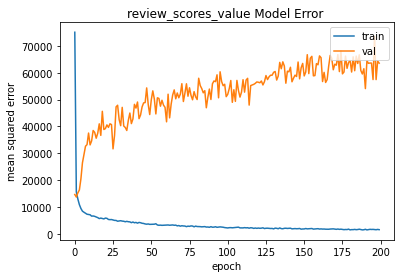

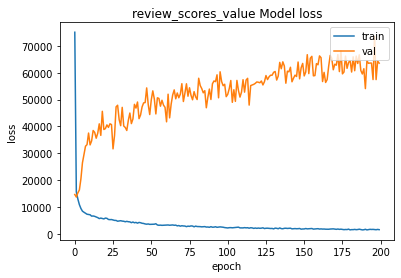

In [118]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('review_scores_value Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_value Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [119]:
mse=history.history["mean_squared_error"][199]
print("Model MSE is : %f" %mse)
dummy = DummyRegressor(strategy="mean").fit(X, Y) 
ydummy = dummy.predict(X)
mse_dummy = mean_squared_error(Y,ydummy)
print("baseline is : %f" %mean_squared_error(Y,ydummy))
if(mse_dummy>mse): 
    print("Our model is accepted")
else:
    print("Our model isnt accepted")

Model MSE is : 1581.570435
baseline is : 13632.679059
Our model is accepted


In [120]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,75093.742188,75093.742188,14679.200195,14679.200195
1,15655.933594,15655.933594,13726.765625,13726.765625
2,12997.239258,12997.239258,15274.929688,15274.929688
3,10898.914062,10898.914062,16379.345703,16379.345703
4,9472.319336,9472.319336,20500.039062,20500.039062
...,...,...,...,...
195,1687.715820,1687.715820,57475.707031,57475.707031
196,1605.937378,1605.937378,73547.343750,73547.343750
197,1558.543213,1558.543213,57461.847656,57461.847656
198,1675.575806,1675.575806,64348.500000,64348.500000


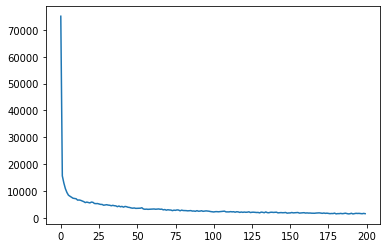

In [121]:
plt.plot(history.history['mean_squared_error'])

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


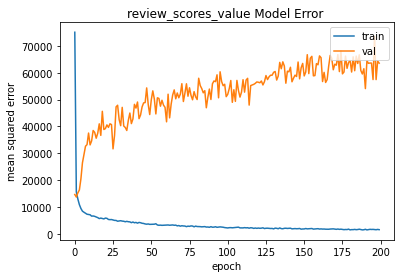

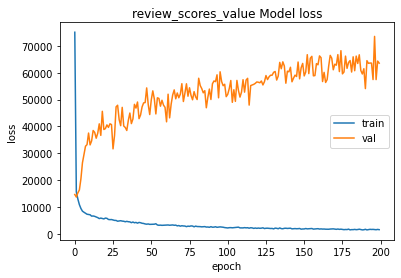

In [122]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_value Model Error ')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('review_scores_value Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()